In [1]:
import kagglehub
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Download latest version
path = kagglehub.dataset_download("uom190346a/global-coffee-health-dataset")
csv_file = os.path.join(path, "synthetic_coffee_health_10000.csv")
data = pd.read_csv(csv_file)


data.head()

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


,ID,Age,Gender,Country,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Health_Issues,Occupation,Smoking,Alcohol_Consumption
0,1,40,Male,Germany,3.5,328.1,7.5,Good,24.9,78,Low,14.5,NaN,Other,0,0
1,2,33,Male,Germany,1.0,94.1,6.2,Good,20.0,67,Low,11.0,NaN,Service,0,0
2,3,42,Male,Brazil,5.3,503.7,5.9,Fair,22.7,59,Medium,11.2,Mild,Office,0,0
3,4,53,Male,Germany,2.6,249.2,7.3,Good,24.7,71,Low,6.6,Mild,Other,0,0
4,5,32,Female,Spain,3.1,298.0,5.3,Fair,24.1,76,Medium,8.5,Mild,Student,0,1


In [2]:
#start with the visualization
#smoking and alcohol are boolean
#Gender Country and Sleep quality must be converted to numerals
"""Country could be hard to convert maybe we just sort them by GDP and give them descending numbers based on that or we use an index measuring health care. Coffee intake and estimated caffeine is redundent """
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       10000 non-null  int64  
 1   Age                      10000 non-null  int64  
 2   Gender                   10000 non-null  object 
 3   Country                  10000 non-null  object 
 4   Coffee_Intake            10000 non-null  float64
 5   Caffeine_mg              10000 non-null  float64
 6   Sleep_Hours              10000 non-null  float64
 7   Sleep_Quality            10000 non-null  object 
 8   BMI                      10000 non-null  float64
 9   Heart_Rate               10000 non-null  int64  
 10  Stress_Level             10000 non-null  object 
 11  Physical_Activity_Hours  10000 non-null  float64
 12  Health_Issues            4059 non-null   object 
 13  Occupation               10000 non-null  object 
 14  Smoking                

,ID,Age,Coffee_Intake,Caffeine_mg,Sleep_Hours,BMI,Heart_Rate,Physical_Activity_Hours,Smoking,Alcohol_Consumption
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.00000,10000.000000
mean,5000.50000,34.949100,2.509230,238.411010,6.636220,23.986860,70.617800,7.48704,0.20040,0.300700
std,2886.89568,11.160939,1.450248,137.748815,1.222055,3.906411,9.822951,4.31518,0.40032,0.458585
min,1.00000,18.000000,0.000000,0.000000,3.000000,15.000000,50.000000,0.00000,0.00000,0.000000
25%,2500.75000,26.000000,1.500000,138.750000,5.800000,21.300000,64.000000,3.70000,0.00000,0.000000
50%,5000.50000,34.000000,2.500000,235.400000,6.600000,24.000000,71.000000,7.50000,0.00000,0.000000
75%,7500.25000,43.000000,3.500000,332.025000,7.500000,26.600000,77.000000,11.20000,0.00000,1.000000
max,10000.00000,80.000000,8.200000,780.300000,10.000000,38.200000,109.000000,15.00000,1.00000,1.000000


In [3]:
from IPython.display import display

display(data['Country'].value_counts())
display(data['Gender'].value_counts())
display(data['Sleep_Quality'].value_counts())
display(data['Health_Issues'].value_counts())
display(data['Occupation'].value_counts())

Country
Canada         543
India          524
Norway         523
China          521
UK             519
Sweden         513
South Korea    512
Finland        510
Italy          509
Switzerland    500
France         499
Belgium        497
Australia      497
Germany        497
Netherlands    494
Spain          486
Mexico         483
Japan          469
Brazil         456
USA            448
Name: count, dtype: int64

Gender
Female    5001
Male      4773
Other      226
Name: count, dtype: int64

Sleep_Quality
Good         5637
Fair         2050
Excellent    1352
Poor          961
Name: count, dtype: int64

Health_Issues
Mild        3579
Moderate     463
Severe        17
Name: count, dtype: int64

Occupation
Office        2073
Other         2038
Student       1968
Healthcare    1964
Service       1957
Name: count, dtype: int64

In [4]:
data[('Country_encoded')], country_categories= pd.factorize(data['Country'])
data['Gender_encoded'], gender_categories = pd.factorize(data['Gender'])
data['Sleep_encoded'], sleep_categories = pd.factorize(data['Sleep_Quality'])
data['Health_encoded'], health_categories = pd.factorize(data['Health_Issues'])
data['Occupation_encoded'], occupation_categories = pd.factorize(data['Occupation'])

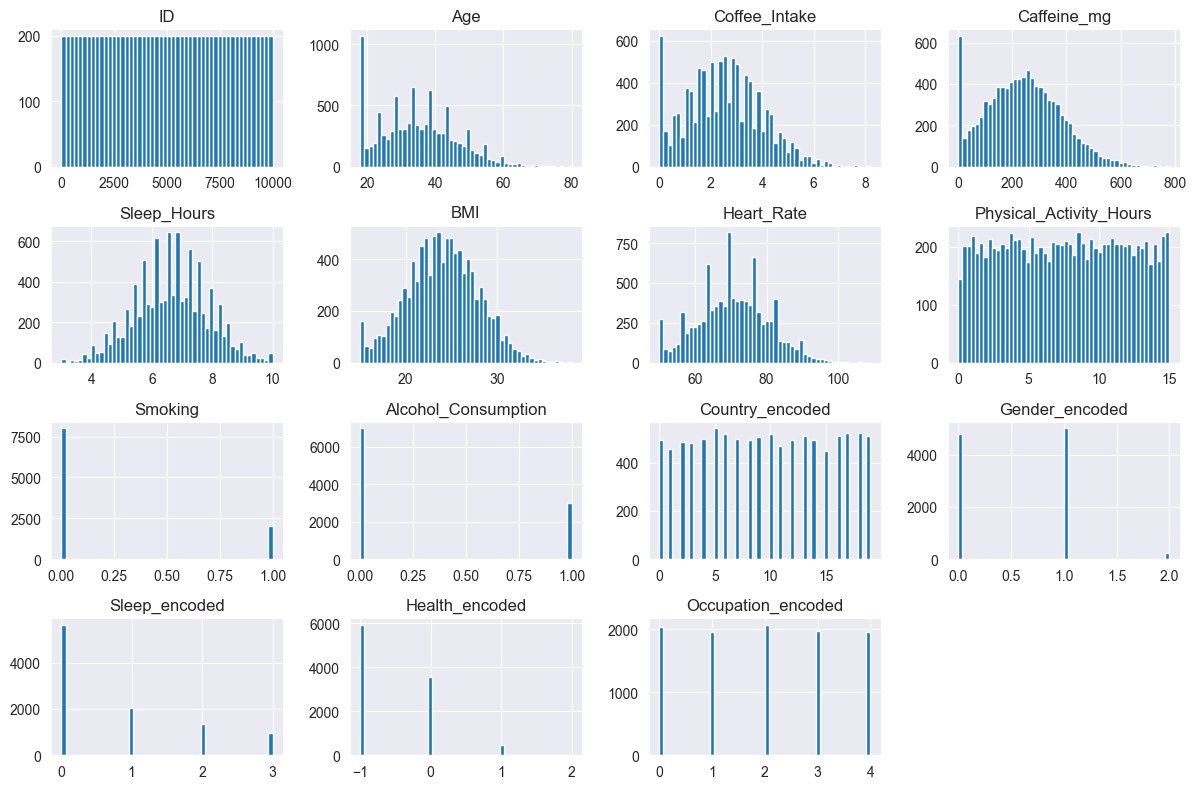

In [5]:
data.hist(bins=50, figsize=(12, 8))
plt.tight_layout()

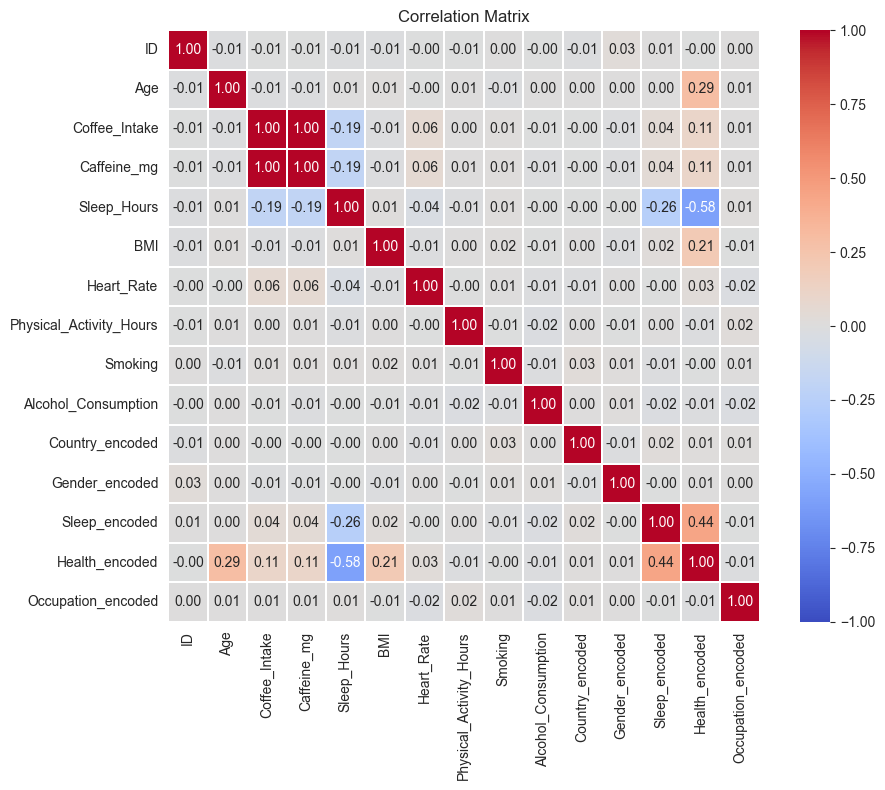

In [6]:
corr = data.corr(numeric_only=True)

# Show heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr,
            annot=True, fmt=".2f",
            vmax=1.0, vmin=-1.0,
            linewidths=0.1,
            cmap="coolwarm",
            square=True, cbar=True)
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

Based on the correlation matrix, we can drop the features "Occupation", "Gender", "Country", "Alcohol", "Smoking" and "Physical Activity", since they are fully uncorrelated with all the other other features except themselve.

Furthermore, "Coffee" seems to be equivalent to "Caffeine intake", no surprise, so we can drop one of them as well.

Note: Between "Country" and "Smoking" seems to be a slight correlation, but nothing note worthy.

Possible Targets: "Health", "Sleep", "Sleep Hours"

Accuracy: 0.997
Sensitivity (macro recall): 0.996

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00      1188
           0       1.00      0.99      1.00       716
           1       0.96      0.99      0.97        93
           2       1.00      1.00      1.00         3

    accuracy                           1.00      2000
   macro avg       0.99      1.00      0.99      2000
weighted avg       1.00      1.00      1.00      2000



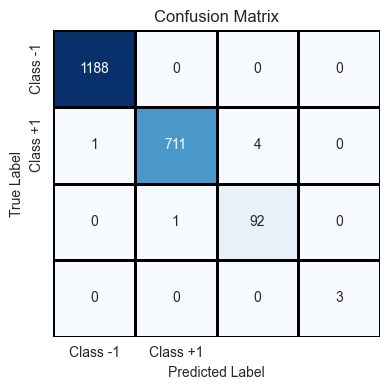

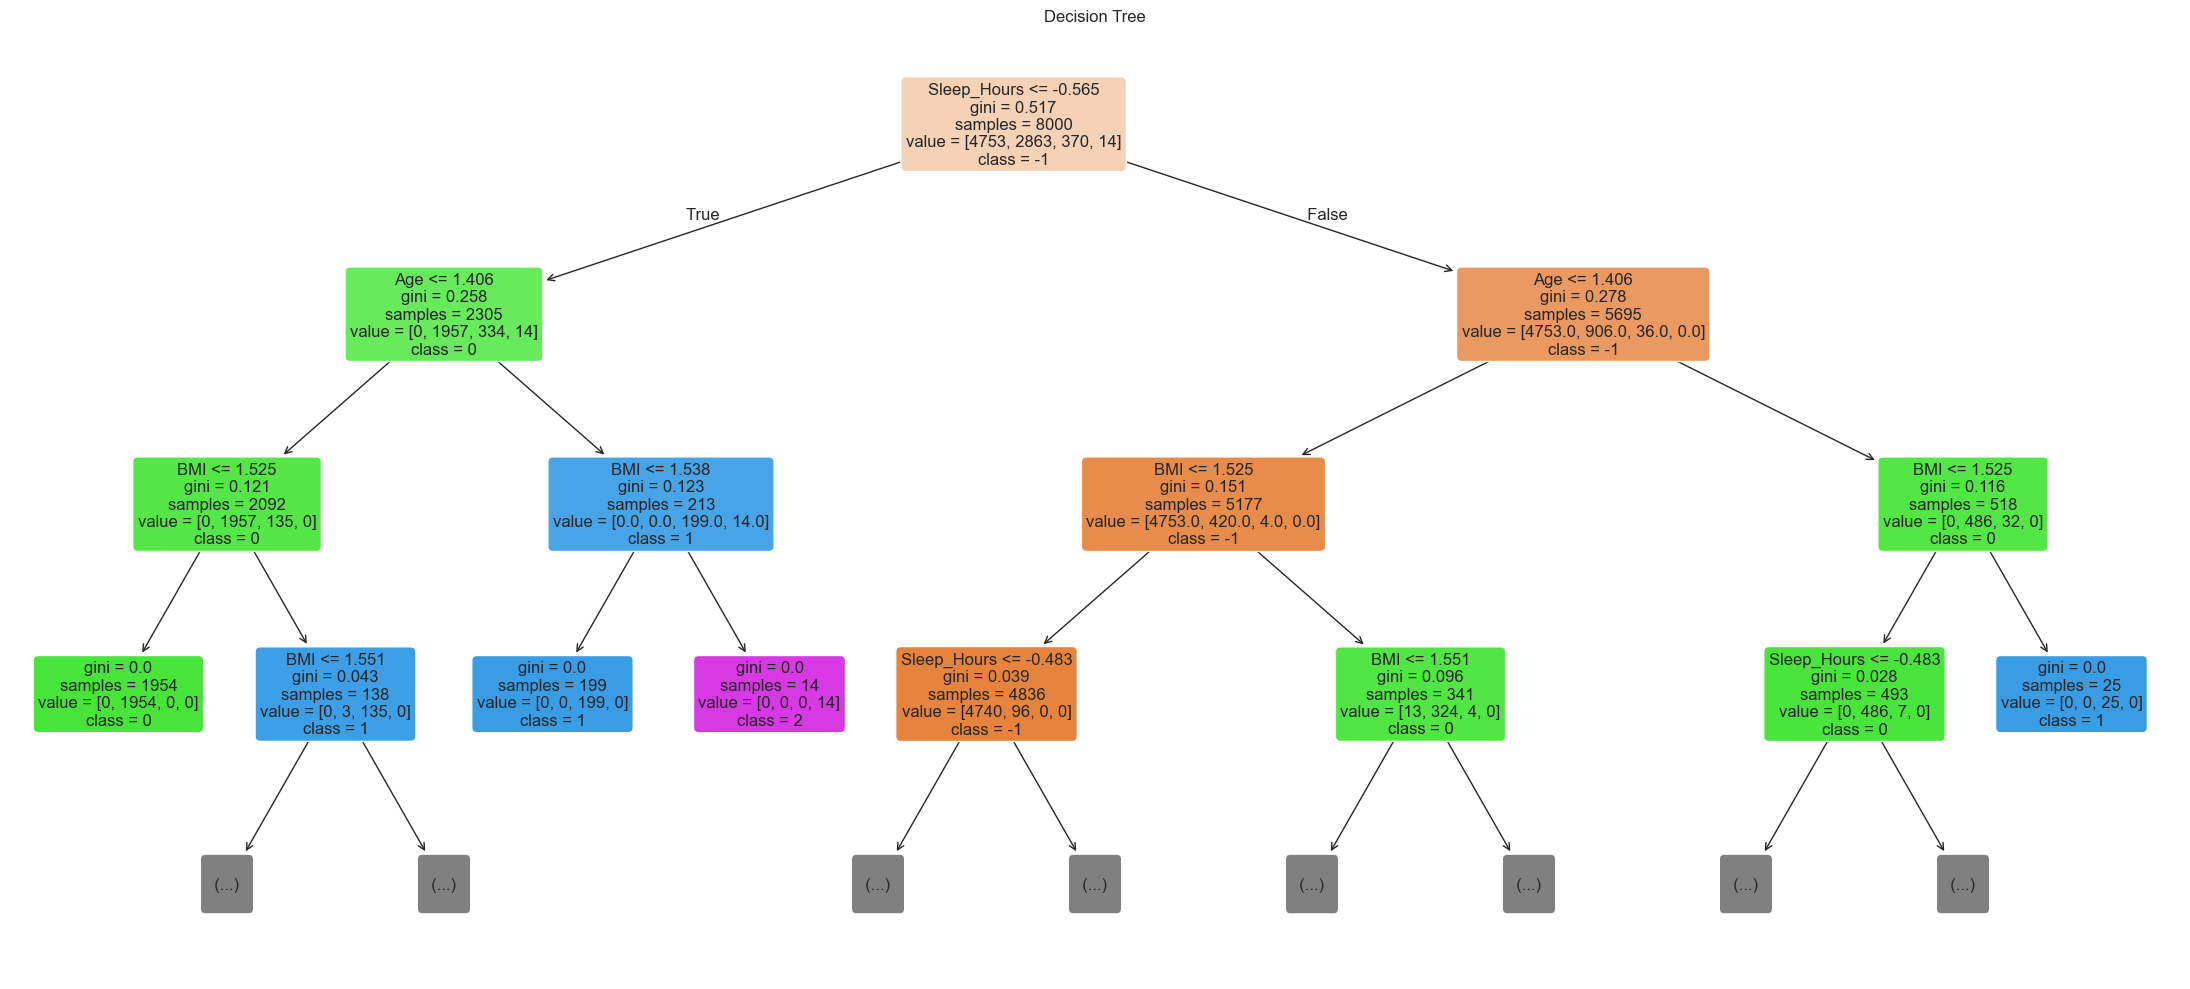

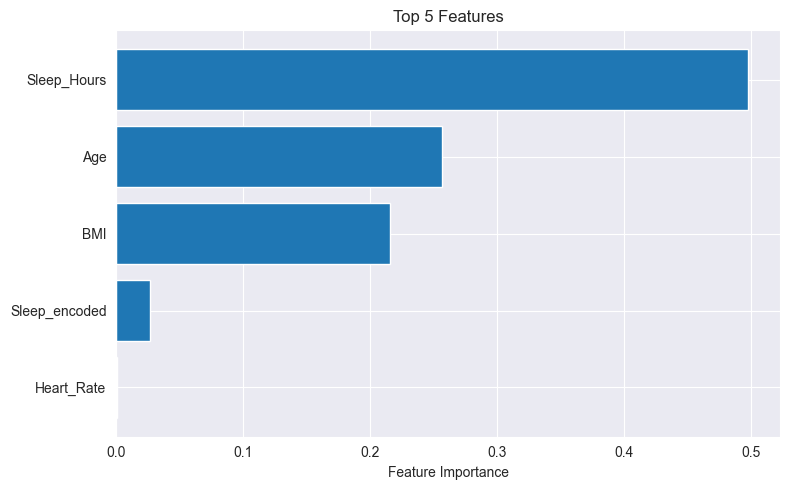

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, recall_score, classification_report, confusion_matrix

# ============================================================
# 1. Split data and select numeric features
# ============================================================
train_df, val_df = train_test_split(
    data,
    test_size=0.2,
    random_state=42,
    stratify=data["Health_encoded"]
)

feature_names = train_df.select_dtypes(include=["number"]).drop(columns=["Health_encoded"]).columns
X_train = train_df[feature_names].values
y_train = train_df["Health_encoded"].values
X_val = val_df[feature_names].values
y_val = val_df["Health_encoded"].values

# ============================================================
# 2. Train pipeline (scaler + decision tree)
# ============================================================
pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("tree", DecisionTreeClassifier(
        criterion="gini",
        max_depth=7,
        random_state=42
    )),
])
pipeline.fit(X_train, y_train)

# ============================================================
# 3. Evaluate model
# ============================================================
y_pred = pipeline.predict(X_val)

print(f"Accuracy: {accuracy_score(y_val, y_pred):.3f}")
print(f"Sensitivity (macro recall): {recall_score(y_val, y_pred, average='macro'):.3f}\n")
print(classification_report(y_val, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_val, y_pred)
labels = ["Class -1", "Class +1"]

plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=labels, yticklabels=labels,
            cbar=False, linewidths=1, linecolor="black")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()

# ============================================================
# 4. Plot decision tree (no back-scaling)
# ============================================================
tree_model = pipeline.named_steps["tree"]

plt.figure(figsize=(22, 10))
plot_tree(
    tree_model,
    feature_names=feature_names,
    class_names=[str(c) for c in tree_model.classes_],
    filled=True,
    rounded=True,
    max_depth=3,           # adjust for readability
    fontsize=12,
    impurity=True
)
plt.title("Decision Tree")
plt.tight_layout()
plt.show()

# ============================================================
# 5. Feature importances
# ============================================================
importances = tree_model.feature_importances_
indices = importances.argsort()[::-1][:5]

plt.figure(figsize=(8, 5))
plt.barh(range(len(indices)), importances[indices][::-1], align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices[::-1]])
plt.xlabel("Feature Importance")
plt.title("Top 5 Features")
plt.tight_layout()
plt.show()

Accuracy: 0.994


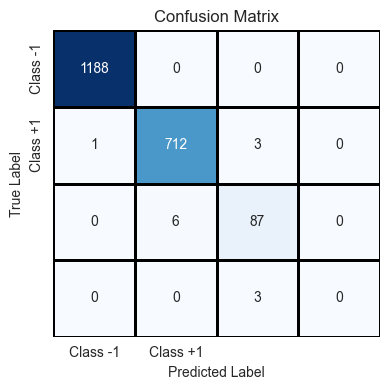

'\nindependent on the amount of estimators i have a problem with the last class that is underrepresented in the training and validation data\n '

In [8]:
from sklearn.ensemble import (RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier)


r_for = Pipeline([
    ("scaler", StandardScaler()),
    ('Random Forest', RandomForestClassifier(n_estimators=100, bootstrap=True, random_state=42, class_weight='balanced'))])
#class weight= balanced helps with compensating for the unbalanced distribution of data

r_for.fit(X_train, y_train)
y_pred = r_for.predict(X_val)
print(f"Accuracy: {accuracy_score(y_val, y_pred):.3f}")

# Confusion matrix
conf_matrix = confusion_matrix(y_val, y_pred)
labels = ["Class -1", "Class +1"]

plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=labels, yticklabels=labels,
            cbar=False, linewidths=1, linecolor="black")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()
"""
independent on the amount of estimators i have a problem with the last class that is underrepresented in the training and validation data
 """